# 1. Install and Import Dependencies


In [1]:
!pip install torch==1.8.2+cu111 torchvision==0.9.2+cu111 torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


You should consider upgrading via the 'C:\Users\HP Computer\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
!cd yolov5 & pip install -r requirements.txt

You should consider upgrading via the 'C:\Users\HP Computer\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
import torch 
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load model

In [5]:
model = torch.hub.load('ultralytics/yolov5','yolov5s')

Using cache found in C:\Users\HP Computer/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2021-12-10 torch 1.8.2+cu111 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [6]:
model


AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

# 3. Make Detections

In [21]:
img = 'https://vcdn-english.vnecdn.net/2016/11/24/Motorbikestrytoweavetheirwaybe-6460-3530-1479955800_1200x0.jpg'

In [22]:
result= model(img)
result.print()

image 1/1: 732x1100 15 persons, 15 cars, 6 motorcycles, 4 buss, 3 trucks, 1 traffic light, 1 stop sign
Speed: 554.8ms pre-process, 24.0ms inference, 3.0ms NMS per image at shape (1, 3, 448, 640)


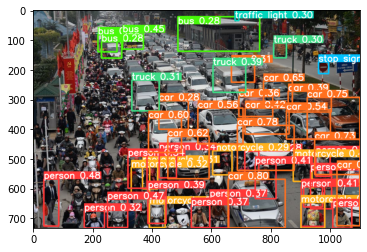

In [23]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()

In [25]:
result.show()


In [20]:
np.array(result.render()).shape

720

# 4. Real time detection

In [26]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    #detect duoc vat
    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(result.render()))
    
    if vc2.waitkey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

**Detec su dung video**
1) import video vao directory va chen ten vao cho trong
<br> cap = cv2.VideoCapture("---")
⠀⠀⠀⠀⠀⠀

# 5. Train from scratch

In [29]:
import uuid 
import os
import time

In [32]:
IMAGES_PATH = os.path.join('data', 'image')
labels = ['awake','drowsy']
number_imgs = 20